# Yelp Review Rating Analysis and Prediction

## Data Used

The reviews2.csv data was used in this report. 

In [55]:
from __future__ import division
import sys, os, re, json
import nltk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from collections import defaultdict, Counter
from typing import List, Tuple, Dict
import seaborn
import time
import datetime

#import cPickle as pickle
import matplotlib.pyplot as plt
import nltk
import numpy as np
import pandas as pd
import pylab
import re
import scipy as sp
import seaborn

from gensim import corpora, models
from nltk.corpus import stopwords
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

from scipy import stats
from scipy.sparse import issparse
from abc import ABCMeta, abstractmethod
from sklearn.base import BaseEstimator, ClassifierMixin
#from sklearn.base import ClassifierMixin
from sklearn.preprocessing import LabelBinarizer
from sklearn.utils import check_X_y, check_array, gen_even_slices
from sklearn.utils.extmath import safe_sparse_dot
from sklearn.utils.extmath import weighted_mode
from sklearn.utils.validation import check_is_fitted
from sklearn.utils.multiclass import check_classification_targets
from sklearn.utils import check_array

from nltk.tokenize import word_tokenize

import threading
from scipy.sparse import hstack as sparse_hstack

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree._tree import DTYPE, DOUBLE
from sklearn.ensemble.base import BaseEnsemble, _partition_estimators


from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import pairwise
from sklearn.exceptions import DataConversionWarning, NotFittedError
from sklearn.utils.extmath import weighted_mode


In [3]:
# read in the data set of reviews2.csv
import pandas as pd
reviews = pd.read_csv("./reviews2.csv", encoding='utf-8', sep=',')
reviews.columns

Index(['review_id', 'user_id', 'business_id', 'stars', 'useful', 'funny',
       'cool', 'text', 'date'],
      dtype='object')

There are nine columns in this data set, the review id, user id, bussiness id, stars, useful, funny, cool, test and date. 

In [2]:
reviews

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,cAQMvg8vdIkXFAmFdmtf8Q,SJ7IbI1QVvia5muxByAv7w,3BzwagIBPQEf_Ic44oZtYQ,5,0,0,0,Very upscale and romantic place. Good was exce...,2019-02-15 03:10:26
1,sjm_uUcQVxab_EeLCqsYLg,0kA0PAJ8QFMeveQWHFqz2A,8zehGz9jnxPqXtOc7KaJxA,4,0,0,0,The food is always great here. The service fro...,2011-07-28 18:05:01
2,3_oBHUOlAC33347F8_vYKg,l8reACV0ZmCyjBZy4wtq-w,FxveeHL_B0Kkz1KjPKyF3A,1,2,2,2,Literally the slowest and worst service I have...,2016-02-05 01:13:15
3,Gi5LSRmTXoL9Bp4jNGPjLw,hn0ZbitvmlHnF--KJGJ6_A,TA1KUSCu8GkWP9w0rmElxw,4,0,0,0,I have been here twice and have had really goo...,2011-10-27 14:32:57
4,R9SFR1FgssHATWd9PpQEHg,BjckP4AW2FXivEAUmh5d3g,PUZSvR-nEHlhEi0gSADu7w,4,0,0,0,Went here with an friend visiting from Italy: ...,2017-09-10 16:16:58
...,...,...,...,...,...,...,...,...,...
1707856,3FGJZ4BxKE-EYpR7i22ODQ,OEgGBGx7vAu9PPef5K_gOg,3BzwagIBPQEf_Ic44oZtYQ,3,3,2,2,I would have loved to give more stars but now ...,2018-01-22 00:11:47
1707857,duS6Tq7Fb9v8QDQXKdWluA,YjgwW0jGrWWgrUetL1acxw,aBcP12iMOwkqBf9yuMAjyQ,5,1,0,0,I fell in love with Bahama Breeze.. The drinks...,2019-01-15 19:26:44
1707858,DemPlfItZQouIFJTXMNJlg,37cpUoM8hlkSQfReIEBd-Q,RjIpiZLefONlg4SfWUjirg,5,5,3,2,"Every time I visit Boston, I make it a point t...",2014-01-17 02:36:26
1707859,7xjmara0Uk3vgHH7Q7tsCw,NX9aW-rgyLyQAwKbyxCuiQ,NWFL1R2KIw_U6WqDS-JlAQ,5,0,0,0,Really delicious sandwiches! The tuna melt was...,2019-09-01 01:51:29


In [6]:
reviews.shape

(1707861, 9)

Totally, there are 1,707,861 obervations in this data set. 

## EDA Analysis

In [7]:
reviews['stars'].value_counts(normalize=False)

5    722908
4    503086
3    234943
2    134182
1    112742
Name: stars, dtype: int64

Define a function to plot the labels of ratios for each stars. 

In [16]:
def plot_labels(df, title=None):
  ds_labels = df[title].value_counts(normalize=True)
  ds_labels.sort_index(inplace=True)
  plt.figure(figsize=(4,3))
  ax = ds_labels.plot(kind="bar")
  ax.set_xlabel(title)
  ax.set_ylabel("Ratio")
  if title is not None:
    plt.savefig(title + ".eps")
  plt.show()

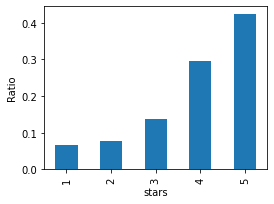

In [17]:
plot_labels(reviews, "stars")

less than 10% have the stars of 1 or 2, more than 40% have the stars of 5, and about 30% have the stars of 4. 

In [19]:
reviews['useful'].value_counts(normalize=False)

0      1024091
1       337595
2       146084
3        72965
4        39676
        ...   
172          1
173          1
177          1
178          1
446          1
Name: useful, Length: 181, dtype: int64

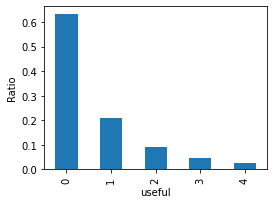

In [25]:
plot_labels(reviews[reviews["useful"] < 5], "useful")

In [20]:
reviews['funny'].value_counts(normalize=False)

0      1373559
1       191882
2        62173
3        27971
4        15040
        ...   
126          1
131          1
142          1
143          1
264          1
Name: funny, Length: 147, dtype: int64

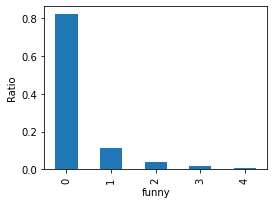

In [26]:
plot_labels(reviews[reviews["funny"] < 5], "funny")

In [22]:
reviews['cool'].value_counts(normalize=False)

0      1272304
1       250379
2        83175
3        36016
4        18922
        ...   
165          1
168          1
175          1
181          1
371          1
Name: cool, Length: 169, dtype: int64

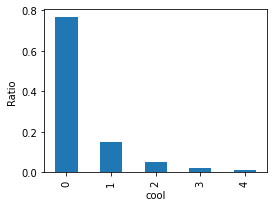

In [27]:
plot_labels(reviews[reviews["cool"] < 5], "cool")

## Baseline Prediction of Rating

In [35]:
reviews['predicted_rating'] = round(sum(reviews.stars)/len(reviews.index))
print("Baseline Rating:", round(sum(reviews.stars)/len(reviews.index)))

Baseline Rating: 4


In [36]:
t = reviews[['stars', 'predicted_rating']].dropna(how='any')

In [85]:
recall = metrics.recall_score(t.stars, t.predicted_rating, average='macro')
f1 = metrics.f1_score(t.stars, t.predicted_rating, average='macro')
accuracy = accuracy_score(t.stars, t.predicted_rating)

baselineResult = {}

data = {'recall':recall,
        'f1_score':f1,
        'accuracy':accuracy}

baselineResult['Baseline'] = data
pd.DataFrame(baselineResult).T

,accuracy,f1_score,recall
Baseline,0.294571,0.091017,0.2


The baseline prediction was 4 for rating, the accuracy was 0.294571 and the F1 score was 0.091017. 

## Text Mining

The distribution of the text variable. 

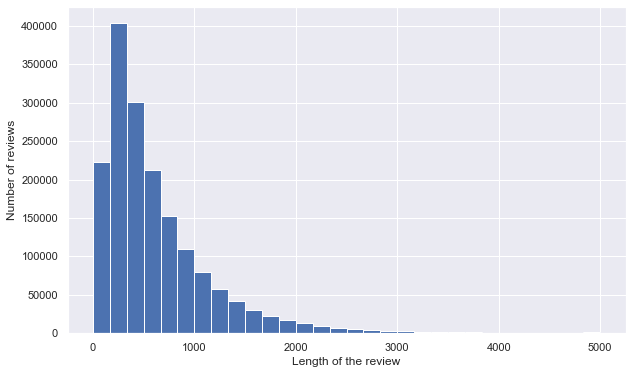

In [34]:
plt.rc('figure', figsize=(10,6))
seaborn.set()
colors = seaborn.color_palette()
reviews.text.dropna().str.len().hist(bins=30)
plt.xlabel('Length of the review')
plt.ylabel('Number of reviews')
plt.show()

In [56]:
ds_temp = reviews["text"].iloc[:10].map(lambda text: re.sub(r"[^a-zA-Z0-9' ]", ' ', text)).map(lambda text: text.split())
print(reviews["text"].iloc[0], '\n', ds_temp.iloc[0])

Very upscale and romantic place. Good was exceptionally good from appetizer to the entree and finally the mouth watering dessert. Servers are pleasant and ambiance was warm and welcoming. 
 ['Very', 'upscale', 'and', 'romantic', 'place', 'Good', 'was', 'exceptionally', 'good', 'from', 'appetizer', 'to', 'the', 'entree', 'and', 'finally', 'the', 'mouth', 'watering', 'dessert', 'Servers', 'are', 'pleasant', 'and', 'ambiance', 'was', 'warm', 'and', 'welcoming']


In [57]:
%time reviews["tokens"] = reviews["text"].map(lambda text: re.sub(r"[^a-zA-Z0-9' ]", ' ', text)).map(lambda text: text.split())

Wall time: 4min 34s


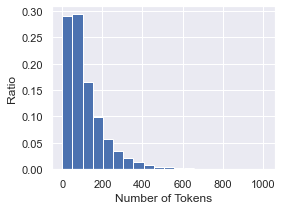

In [59]:
reviews["num_tokens"] = reviews["tokens"].map(len)
ax = reviews["num_tokens"].hist(bins=20, 
                                 figsize=(4,3),
                                 weights=np.ones(reviews.shape[0])/reviews.shape[0])
ax.set_xlabel("Number of Tokens")
ax.set_ylabel("Ratio")
plt.show()

In [60]:
print(len(reviews[reviews["num_tokens"] <= 128]) / len(reviews["num_tokens"]))
print(len(reviews[reviews["num_tokens"] <= 256]) / len(reviews["num_tokens"]))

0.684508282582716
0.9100851884316112


In [61]:
reviews.drop(columns=["tokens", "num_tokens"], inplace=True)

In [62]:
%time reviews["num_tokens"] = reviews["text"].\
map(lambda text: re.sub(r"[^a-zA-Z0-9' ]", ' ', text)).\
map(lambda text: len(text.split()))

Wall time: 1min 10s


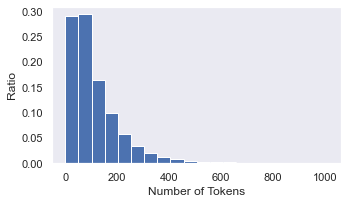

In [63]:
ax = reviews["num_tokens"].hist(bins=20,
                                  figsize=(5,3),
                                  grid=False,
                                  weights=np.ones(reviews.shape[0])/reviews.shape[0])
ax.set_xlabel("Number of Tokens")
ax.set_ylabel("Ratio")
plt.savefig("num_tokens.eps")
plt.tight_layout()
plt.show()

In [64]:
print(len(reviews[reviews["num_tokens"] <= 128]) / len(reviews["num_tokens"]))
print(len(reviews[reviews["num_tokens"] <= 256]) / len(reviews["num_tokens"]))

0.684508282582716
0.9100851884316112


In [66]:
reviews.drop(columns=["num_tokens"], inplace=True)

## Vectorization

In [70]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

def extract_features(df_train, df_test):
  vectorizer = TfidfVectorizer(analyzer='word', 
                               stop_words='english',
                               ngram_range=(1, 2),
                               lowercase=True,
                               min_df=5,
                               binary=False)
  X_train = vectorizer.fit_transform(df_train["text"])
  X_test = vectorizer.transform(df_test["text"])
  y_train = df_train["stars"].tolist()
  y_test = df_test["stars"].tolist()
  
  return X_train, X_test, y_train, y_test

In [69]:
from sklearn.model_selection import train_test_split

reviews_train, reviews_test = train_test_split(reviews, test_size=500000, 
                                         random_state=50, shuffle=True)

In [71]:
%time X_train, X_test, y_train, y_test = extract_features(reviews_train, reviews_test)

Wall time: 12min 31s


## Binary Logistic Regression for Count Vectorizer

In [72]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, mean_squared_error
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix

In [73]:
def evaluate_model_Xy(model, X, y, y_pred=None, label="Training", model_name="model"):
  if y_pred is None:
    y_pred = model.predict(X)

  print(label + ' Set')
  print("Accuracy:", accuracy_score(y, y_pred))
  print()

  print(classification_report(y, y_pred, digits=4))
  disp = plot_confusion_matrix(model, X, y, 
                               cmap=plt.cm.Blues, normalize='true')
  plt.savefig(model_name + "_" + label.lower() + ".eps")
  plt.show()
  print()

In [74]:
def evaluate_model(model, model_name="model",
                   y_train_pred=None, y_test_pred=None):
  evaluate_model_Xy(model, X_train, y_train, label="Training", model_name=model_name)
  evaluate_model_Xy(model, X_test, y_test, label="Testing", model_name=model_name)

In [75]:
from sklearn.linear_model import LogisticRegression
my_lr = LogisticRegression(penalty='l2',
                            tol=1e-4,
                            C=5.0,
                            fit_intercept=True,
                            class_weight='balanced',
                            random_state=0,
                            solver='lbfgs',
                            max_iter=100,
                            multi_class='auto',
                            verbose=1,
                            n_jobs=-1)

In [76]:
my_lr.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed: 24.7min finished


LogisticRegression(C=5.0, class_weight='balanced', n_jobs=-1, random_state=0,
                   verbose=1)

Training Set
Accuracy: 0.6756356898682878

              precision    recall  f1-score   support

           1     0.6862    0.8234    0.7486     79840
           2     0.5729    0.6635    0.6149     94842
           3     0.5209    0.6209    0.5665    165780
           4     0.6112    0.5464    0.5770    355818
           5     0.8017    0.7625    0.7816    511581

    accuracy                         0.6756   1207861
   macro avg     0.6386    0.6833    0.6577   1207861
weighted avg     0.6814    0.6756    0.6765   1207861



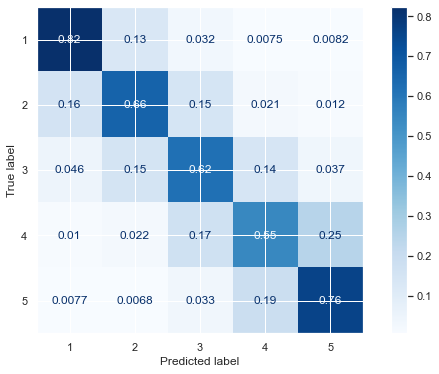


Testing Set
Accuracy: 0.621684

              precision    recall  f1-score   support

           1     0.5994    0.7241    0.6558     32902
           2     0.4356    0.5000    0.4656     39340
           3     0.4532    0.5391    0.4924     69163
           4     0.5585    0.4984    0.5267    147268
           5     0.7778    0.7414    0.7592    211327

    accuracy                         0.6217    500000
   macro avg     0.5649    0.6006    0.5799    500000
weighted avg     0.6297    0.6217    0.6239    500000



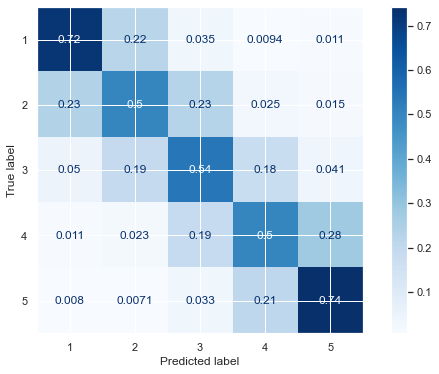

In [78]:
evaluate_model(my_lr, model_name="lr_count_bin")

## Random Forest Model

In [82]:
from sklearn.ensemble import RandomForestClassifier

my_rf = RandomForestClassifier(n_estimators=100,
                                criterion="gini",
                                max_depth=5, 
                                min_samples_split=2,
                                min_samples_leaf=100, 
                                max_features="auto", 
                                n_jobs=-1,
                                verbose=1,
                                random_state=0,
                                class_weight='balanced')

In [83]:
my_rf.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    7.8s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   24.4s finished


RandomForestClassifier(class_weight='balanced', max_depth=5,
                       min_samples_leaf=100, n_jobs=-1, random_state=0,
                       verbose=1)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:  1.3min
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:  3.1min finished


Training Set
Accuracy: 0.48264576801469705

              precision    recall  f1-score   support

           1     0.3224    0.5997    0.4193     79840
           2     0.2575    0.2389    0.2478     94842
           3     0.3505    0.2347    0.2811    165780
           4     0.4771    0.2056    0.2873    355818
           5     0.5663    0.7826    0.6571    511581

    accuracy                         0.4826   1207861
   macro avg     0.3947    0.4123    0.3786   1207861
weighted avg     0.4700    0.4826    0.4487   1207861



[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:  1.2min
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:  3.2min finished


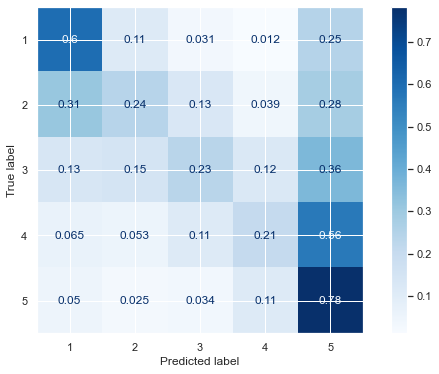

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:   31.4s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:  1.4min finished


Testing Set
Accuracy: 0.481462

              precision    recall  f1-score   support

           1     0.3223    0.6016    0.4198     32902
           2     0.2573    0.2381    0.2473     39340
           3     0.3517    0.2333    0.2805     69163
           4     0.4726    0.2046    0.2856    147268
           5     0.5650    0.7822    0.6561    211327

    accuracy                         0.4815    500000
   macro avg     0.3938    0.4120    0.3779    500000
weighted avg     0.4681    0.4815    0.4473    500000



[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:   30.5s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:  1.3min finished


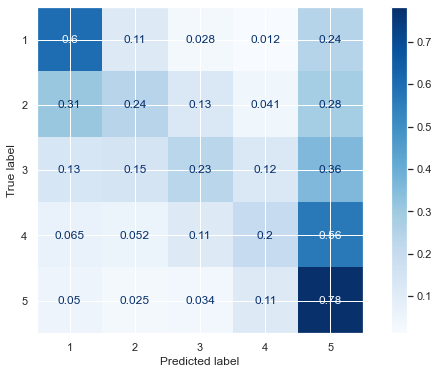

In [84]:
evaluate_model(my_rf, model_name="rf")

## Concusion

In this report, the yelp review data was analysis with text mining. The accuracy of baseline is only 0.2946. The logistic regression model results showed the training accuracy was 0.6756 and teh testing accuracy was 0.6217. The random forest model results showed the training accuracy was 0.4826 and teh testing accuracy was 0.4815. 